# Convolution Neural Network: CIFAR-10 Dataset

This notebook uses the classic [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset, which is a labeled subset of the 80 million tiny images dataset. It was collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


## The CIFAR-10 dataset

### Get the data
CIFAR-10 dataset is provided by Keras directly. The following codes show how to load it. 

In [8]:
# the data, shuffled and split between train and test sets 
from tensorflow.keras.datasets import cifar10
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [9]:
y_train_pre

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

### Visualize data

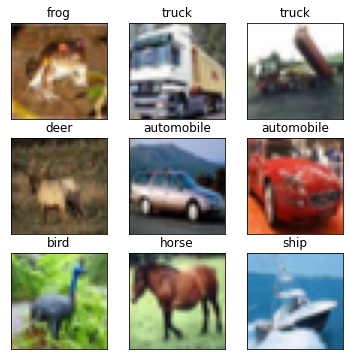

In [10]:
label_lst = ["airplane", "automobile", "bird", "cat", "deer",
            "dog", "frog", "horse", "ship", "truck"]
fig = plt.figure(figsize=(6, 6))
col = 3
row = 3
for i in range(col*row):
    label = label_lst[y_train_pre[i][0]]
    img = X_train_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('{}'.format(label))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

### convert class vectors to binary class matrices
convert class label to one-hot coding

In [11]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 9 samples are 6, 9,9,4,1,1,2,7,8
y_train[:9,] 

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

### Normalize the features

In [12]:
img_rows, img_cols = 32, 32
X_train = X_train_pre.astype('float32') 
X_test = X_test_pre.astype('float32')
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_test,axis=(0,1,2,3))
X_train = (X_train-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)
#X_train /= 255. 
#X_test /= 255.

validation_split = 0.2
index = np.random.permutation(X_train.shape[0])
train_idx = int(X_train.shape[0]*validation_split)
X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

training data shape: (40000, 32, 32, 3)
40000 train samples, 10000 validation samples, 10000 test samples


In [13]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## The model

# Build the model

## 1. Fully Connected Neural Network - Iteration 1

Epoch 1/100
625/625 [==============================] - 21s 33ms/step - loss: 1.8968 - accuracy: 0.3526 - val_loss: 1.6398 - val_accuracy: 0.4271
Epoch 2/100
625/625 [==============================] - 20s 33ms/step - loss: 1.6602 - accuracy: 0.4201 - val_loss: 1.5614 - val_accuracy: 0.4552
Epoch 3/100
625/625 [==============================] - 21s 33ms/step - loss: 1.5755 - accuracy: 0.4488 - val_loss: 1.5141 - val_accuracy: 0.4726
Epoch 4/100
625/625 [==============================] - 20s 32ms/step - loss: 1.5167 - accuracy: 0.4740 - val_loss: 1.5297 - val_accuracy: 0.4671
Epoch 5/100
625/625 [==============================] - 22s 35ms/step - loss: 1.4670 - accuracy: 0.4883 - val_loss: 1.4816 - val_accuracy: 0.4850
Epoch 6/100
625/625 [==============================] - 25s 39ms/step - loss: 1.4196 - accuracy: 0.5057 - val_loss: 1.4635 - val_accuracy: 0.4858
Epoch 7/100
625/625 [==============================] - 20s 33ms/step - loss: 1.3857 - accuracy: 0.5188 - val_loss: 1.4457 - val_ac

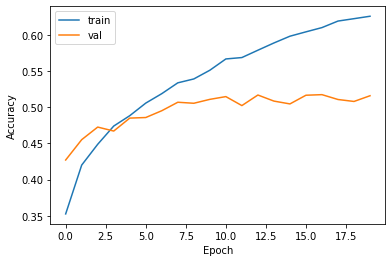

Testing set accuracy: 50.59%


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

#Train the model

optimizer = tf.keras.optimizers.legacy.RMSprop(0.0005,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display training progress by printing a single dot for each completed epoch
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 100
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val),
                              callbacks=[early_stop])

#plot

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

# make Predictions

_, acc = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))



313/313 [==============================] - 3s 9ms/step


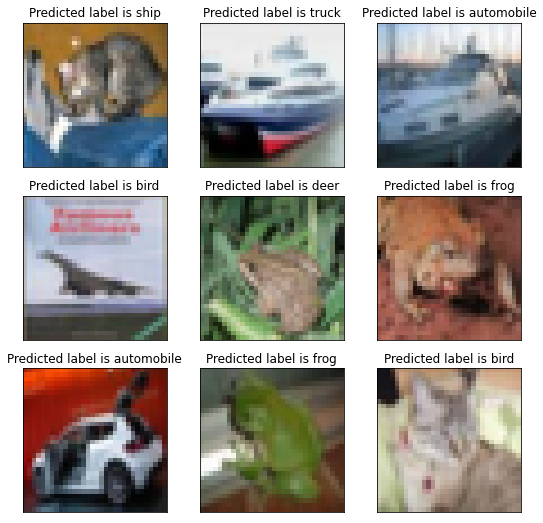

In [ ]:
#Visualize preditions

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred[:9]

fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(col*row):
    pred = label_lst[y_pred[i]]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## 2. Build a convolution neural network - Iteration 2 - **Best Model**

In [ ]:
# Import necessary modules
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))

# Add the first dropout layer
model.add(Dropout(0.2))

# Add the second convolutional layer
model.add(Conv2D(32, (3,3), activation='relu'))

# Add the maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the third convolutional layer
model.add(Conv2D(64, (3,3), activation='relu'))

# Add the second dropout layer
model.add(Dropout(0.2))

# Add the fourth convolutional layer
model.add(Conv2D(64, (3,3), activation='relu'))

# Add the second maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add the flatten layer
model.add(Flatten())

# Add the fully connected layer
model.add(Dense(256, activation='relu'))

# Add the third dropout layer
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(10, activation='softmax'))




### Inspect the model

Use the `.summary` method to print a simple description of the model

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 dropout_8 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 dropout_9 (Dropout)         (None, 12, 12, 64)        0         
                                                      

### Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(X_train)

### Train the model

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(0.0005,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 100
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X_train, y_train, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val),
                              callbacks=[early_stop])

Epoch 1/100
625/625 [==============================] - 179s 286ms/step - loss: 1.6033 - accuracy: 0.4205 - val_loss: 1.3534 - val_accuracy: 0.5302
Epoch 2/100
625/625 [==============================] - 166s 266ms/step - loss: 1.2281 - accuracy: 0.5624 - val_loss: 1.1095 - val_accuracy: 0.6131
Epoch 3/100
625/625 [==============================] - 172s 274ms/step - loss: 1.0425 - accuracy: 0.6325 - val_loss: 0.9422 - val_accuracy: 0.6701
Epoch 4/100
625/625 [==============================] - 169s 270ms/step - loss: 0.9128 - accuracy: 0.6816 - val_loss: 0.8931 - val_accuracy: 0.6862
Epoch 5/100
625/625 [==============================] - 174s 279ms/step - loss: 0.8102 - accuracy: 0.7165 - val_loss: 0.8292 - val_accuracy: 0.7100
Epoch 6/100
625/625 [==============================] - 172s 275ms/step - loss: 0.7299 - accuracy: 0.7458 - val_loss: 0.7923 - val_accuracy: 0.7249
Epoch 7/100
625/625 [==============================] - 172s 275ms/step - loss: 0.6600 - accuracy: 0.7679 - val_loss: 0

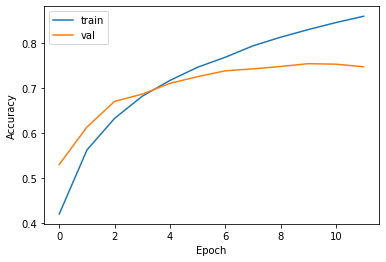

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

### Make predictions

Calculate the classification accuracy for testing set

In [ ]:
_, acc = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 73.86%


Make predictions for testing data

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred[:9]

313/313 [==============================] - 9s 28ms/step


array([3, 8, 8, 0, 6, 5, 9, 2, 3])

Visualize predictions

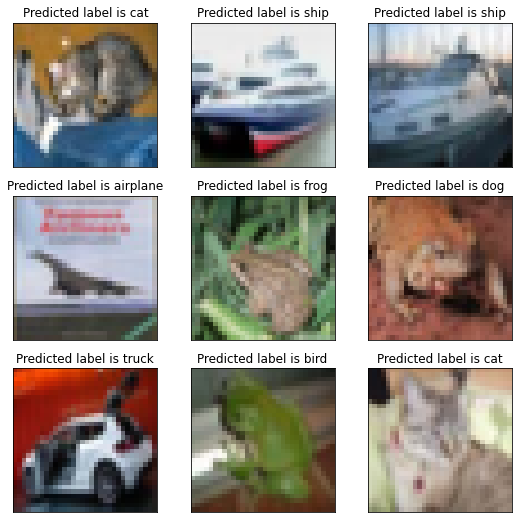

In [ ]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(col*row):
    pred = label_lst[y_pred[i]]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## 3. Build a convolution neural network - Iteration 3

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Import necessary modules
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])



In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                     

In [14]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [ ]:
optimizer = tf.keras.optimizers.legacy.Adam(0.0001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 70
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history = model.fit(X_train, y_train, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val),
                              callbacks=[early_stop])

Epoch 1/70
625/625 [==============================] - 316s 504ms/step - loss: 2.1858 - accuracy: 0.3549 - val_loss: 1.4014 - val_accuracy: 0.5110
Epoch 2/70
625/625 [==============================] - 293s 469ms/step - loss: 1.6446 - accuracy: 0.4700 - val_loss: 1.3398 - val_accuracy: 0.5385
Epoch 3/70
625/625 [==============================] - 307s 491ms/step - loss: 1.4190 - accuracy: 0.5257 - val_loss: 1.2150 - val_accuracy: 0.5795
Epoch 4/70
625/625 [==============================] - 305s 487ms/step - loss: 1.2631 - accuracy: 0.5709 - val_loss: 1.1816 - val_accuracy: 0.5986
Epoch 5/70
625/625 [==============================] - 295s 472ms/step - loss: 1.1432 - accuracy: 0.6063 - val_loss: 1.0926 - val_accuracy: 0.6224
Epoch 6/70
625/625 [==============================] - 300s 480ms/step - loss: 1.0594 - accuracy: 0.6339 - val_loss: 1.0086 - val_accuracy: 0.6531
Epoch 7/70
625/625 [==============================] - 300s 480ms/step - loss: 0.9785 - accuracy: 0.6573 - val_loss: 0.9464 -

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
_, acc = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred[:9]

In [ ]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(col*row):
    pred = label_lst[y_pred[i]]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## 4. Build a convolution neural network - Iteration 4 - Could lead to better performance if we use higher number of epochs

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Import necessary modules
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])



In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [15]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.5,
    height_shift_range=0.5,
    horizontal_flip=True,
    )
datagen.fit(X_train)

In [ ]:
optimizer = tf.keras.optimizers.legacy.SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Display training progress by printing a single dot for each completed epoch
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        # calculate training time
        t = time.monotonic() - self.time
        print('| Epoch {:2} | training time {:6.2f}s | train loss {:6.2f} | validation loss {:6.2f}'
              .format(epoch, t, logs['loss'], logs['val_loss']))
        
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()

EPOCHS = 100
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, batch_size=BATCH,
                              epochs=EPOCHS, verbose=1, validation_data=(X_val, y_val),
                              callbacks=[early_stop])

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
_, acc = model.evaluate(X_test, y_test, batch_size=128, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred[:9]

In [ ]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(col*row):
    pred = label_lst[y_pred[i]]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i+1)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()